<a href="https://colab.research.google.com/github/GangaramSiddam/Machine_Learning/blob/main/placements_logistic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('placement.csv')

#steps

1. preprocess+ EDA+ Feature selection
2. extract input and output columns
3. scale the values
4. train and test split
5. Train the model
6. Evaluate the model/ Model selection
7. deploy the model

In [3]:
df.head()

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0


In [4]:
df = df.iloc[:,1:]

In [5]:
df.head()

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   cgpa       100 non-null    float64
 1   iq         100 non-null    float64
 2   placement  100 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 2.5 KB


Text(0, 0.5, 'IQ')

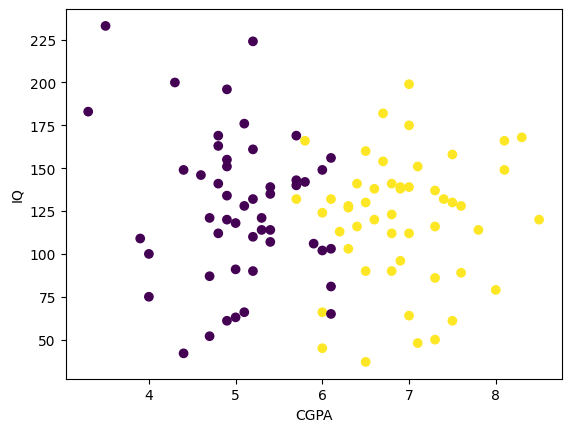

In [7]:
plt.scatter(df['cgpa'],df['iq'],c=df['placement'])
plt.xlabel('CGPA')
plt.ylabel('IQ')
#plt.legend()

In [8]:
X = df.iloc[:,0:2]
y = df.iloc[:,-1]

In [9]:
X

,cgpa,iq
0,6.8,123.0
1,5.9,106.0
2,5.3,121.0
3,7.4,132.0
4,5.8,142.0
...,...,...
95,4.3,200.0
96,4.4,42.0
97,6.7,182.0
98,6.3,103.0


In [10]:
y.shape

(100,)

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1)

In [13]:
X_train.shape

(90, 2)

In [14]:
#scaling the values

from sklearn.preprocessing import StandardScaler

In [15]:
scaler = StandardScaler()

In [16]:
X_train  = scaler.fit_transform(X_train)

In [17]:
X_train

array([[ 0.9746351 ,  0.71742942],
       [-0.86429905,  1.41082126],
       [ 0.69879498,  0.44007269],
       [-0.77235234, -0.41973319],
       [-1.96765954, -0.44746887],
       [-1.04819247,  0.71742942],
       [ 1.89410218,  0.66195808],
       [ 0.42295485, -0.97444667],
       [-1.59987271,  2.07647743],
       [-0.77235234,  2.74213359],
       [ 0.23906144,  0.05177326],
       [ 2.07799559,  1.18893587],
       [-0.95624576, -0.1978478 ],
       [-0.68040564, -0.11464078],
       [-1.04819247,  0.24592297],
       [ 0.05516802, -0.61388291],
       [ 0.69879498, -0.36426185],
       [-0.58845893,  0.27365865],
       [-0.58845893, -0.50294021],
       [-1.507926  ,  0.66195808],
       [-1.14013917,  1.21667155],
       [-1.04819247,  0.82837212],
       [-0.68040564, -0.3087905 ],
       [ 1.43436864, -1.00218234],
       [-2.51933979,  1.60497098],
       [ 0.05516802,  0.19045163],
       [-0.03677868, -2.22255198],
       [ 0.05516802, -1.6678385 ],
       [ 0.05516802,

In [18]:
X_test = scaler.transform(X_test)

In [19]:
X_test

array([[-1.14013917,  0.44007269],
       [-1.87571284, -1.39048177],
       [-2.33544637,  2.99175466],
       [ 0.42295485, -2.44443736],
       [-1.23208588, -2.02840226],
       [ 1.43436864,  0.07950893],
       [ 0.88268839,  2.04874176],
       [-1.87571284, -0.69708993],
       [ 1.15852852, -2.08387361],
       [ 0.05516802, -1.22406773]])

In [20]:
from sklearn.linear_model import LogisticRegression

In [21]:
clf = LogisticRegression()

In [22]:
clf.fit(X_train,y_train)

LogisticRegression()

In [23]:
y_pred = clf.predict(X_test)

In [24]:
y_test

51    0
68    0
50    0
82    1
94    0
30    1
26    1
18    0
77    1
78    0
Name: placement, dtype: int64

In [25]:
from sklearn.metrics import accuracy_score

In [26]:
accuracy_score(y_test,y_pred)

0.9

In [27]:
!pip install mlextend

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Could not find a version that satisfies the requirement mlextend (from versions: none)
ERROR: No matching distribution found for mlextend


In [28]:
from mlxtend.plotting import plot_decision_regions

In [29]:
pip install mlxtend --upgrade --no-deps

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


<Axes: >

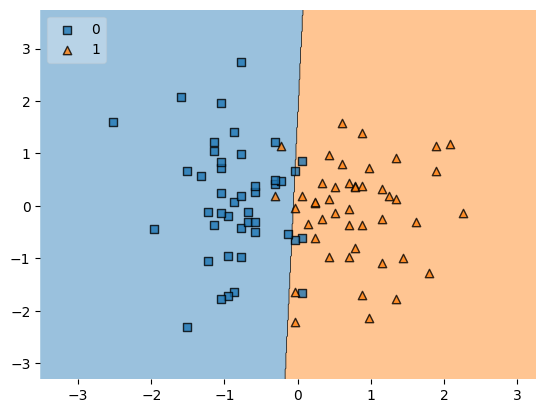

In [30]:
# Plotting decision regions
plot_decision_regions(X_train, y_train.values, clf=clf, legend=2)

In [31]:
import pickle

In [33]:
pickle.dump(clf,open('model.pkl','wb'))